In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#读入数据
data = genfromtxt(r"Delivery.csv",delimiter=",")
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [5]:
#切分数据
x_data = data[:,:-1]
y_data = data[:,-1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [11]:
#学习率learning rate
lr = 0.0001
#参数
theta0 = 0
theta1 = 0
theta2 = 0
#最大迭代次数
epochs = 1000

#最小二乘法
def compute_error(theta0,theta1,theta2,x_data,y_data):
    totalError = 0
    for i in range(len(x_data)):
        totalError += (y_data[i] - (theta1 * x_data[i,0] + theta2 * x_data[i,1] + theta0))**2
    return totalError

def gradient_decent(x_data,y_data,theta0,theta1,theta2,lr,epochs):
    #计算总数据量
    m = float(len(x_data))
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
        for j in range(len(x_data)):
            theta0_grad += -(y_data[j] - (theta1 * x_data[j,0] + theta2 * x_data[j,1] + theta0))
            theta1_grad += -(y_data[j] - (theta1 * x_data[j,0] + theta2 * x_data[j,1] + theta0))*x_data[j,0]
            theta2_grad += -(y_data[j] - (theta1 * x_data[j,0] + theta2 * x_data[j,1] + theta0))*x_data[j,1]
        theta0 = theta0 - lr * (1 / m) * theta0_grad
        theta1 = theta1 - lr * (1 / m) * theta1_grad
        theta2 = theta2 - lr * (1 / m) * theta2_grad
    return theta0,theta1,theta2

In [12]:
print("Starting theta0 = {0},theta1 = {1}, theta2 = {2}, error = {3}".
     format(theta0,theta1,theta2,compute_error(theta0,theta1,theta2,x_data,y_data)))
print("Running")
theta0 ,theta1 , theta2 = gradient_decent(x_data , y_data , theta0 , theta1 , theta2 , lr , epochs)
print("After {0} iterations theta0 = {1},theta1 = {2}, theta2 = {3}, error = {4}".
     format(epochs,theta0,theta1,theta2,compute_error(theta0,theta1,theta2,x_data,y_data)))

Starting theta0 = 0,theta1 = 0, theta2 = 0, error = 472.79999999999995
Running
After 1000 iterations theta0 = 0.0069714161966786346,theta1 = 0.08021042690771771, theta2 = 0.07611036240566812, error = 7.731271432218118


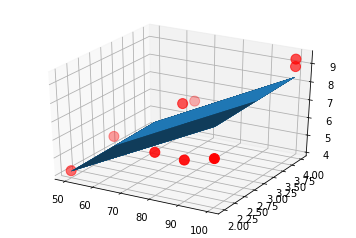

In [22]:
#建立3d坐标轴
ax = plt.axes(projection = '3d')
ax.scatter3D(x_data[:,0],x_data[:,1],y_data , c='r' , s = 100)

x0 , x1 = np.meshgrid(x_data[:,0],x_data[:,1])
z = theta0 + theta1 * x0 + theta2 * x1

ax.plot_surface(x0,x1,z)
plt.show()